In [2]:
import numpy as np

# Manually create a NumPy array simulating a column of ordinal values
ordinal_column = np.array(['Low', 'Medium', 'High', 'Low', 'High', 'Medium'])

# Define a mapping for label encoding
label_encoding = {'Low': 1, 'Medium': 2, 'High': 3}

# Apply the mapping to convert the column to numerical values
encoded_column = np.array([label_encoding[value] for value in ordinal_column])

print("Original column:", ordinal_column)
print("Encoded column:", encoded_column)


Original column: ['Low' 'Medium' 'High' 'Low' 'High' 'Medium']
Encoded column: [1 2 3 1 3 2]


In [6]:
import numpy as np

ordinal_column = np.array(['Low', 'Medium', 'High', 'Low', 'High', 'Medium'])

unique_values = np.unique(ordinal_column)
print(unique_values)

one_hot_encoded = np.zeros((ordinal_column.size, unique_values.size))
print(one_hot_encoded)

for i, val in enumerate(ordinal_column):
    one_hot_encoded[i, unique_values == val] = 1

print("Original column:", ordinal_column)
print("One-hot encoded column:\n", one_hot_encoded)


['High' 'Low' 'Medium']
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Original column: ['Low' 'Medium' 'High' 'Low' 'High' 'Medium']
One-hot encoded column:
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [13]:
import time

# Create a large dataset of categorical data
ordinal_column = np.array(['Low', 'Medium', 'High', 'High', 'Medium', 'Low'])

unique_values = np.unique(ordinal_column)

# One-hot encoding using the loop method
start_time = time.time()
unique_values, inv_index = np.unique(ordinal_column, return_inverse=True)
print(f'length of unique values: {len(unique_values)}')
print(f"Unique values : {unique_values} \n and counts: {inv_index}")
one_hot_encoded = np.eye(len(unique_values))[inv_index]
print(one_hot_encoded[:10])
print(f"Vectorized One-Hot Encoding Time: {time.time() - start_time:.5f} seconds")


length of unique values: 3
Unique values : ['High' 'Low' 'Medium'] 
 and counts: [1 2 0 0 2 1]
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Vectorized One-Hot Encoding Time: 0.00129 seconds


Leptokurtic: Skewness=1.43, Kurtosis=13.20
Mesokurtic: Skewness=-0.06, Kurtosis=0.14
Platykurtic: Skewness=0.00, Kurtosis=-1.21
Positively Skewed: Skewness=4.44, Kurtosis=34.20
Negatively Skewed: Skewness=-4.70, Kurtosis=35.44


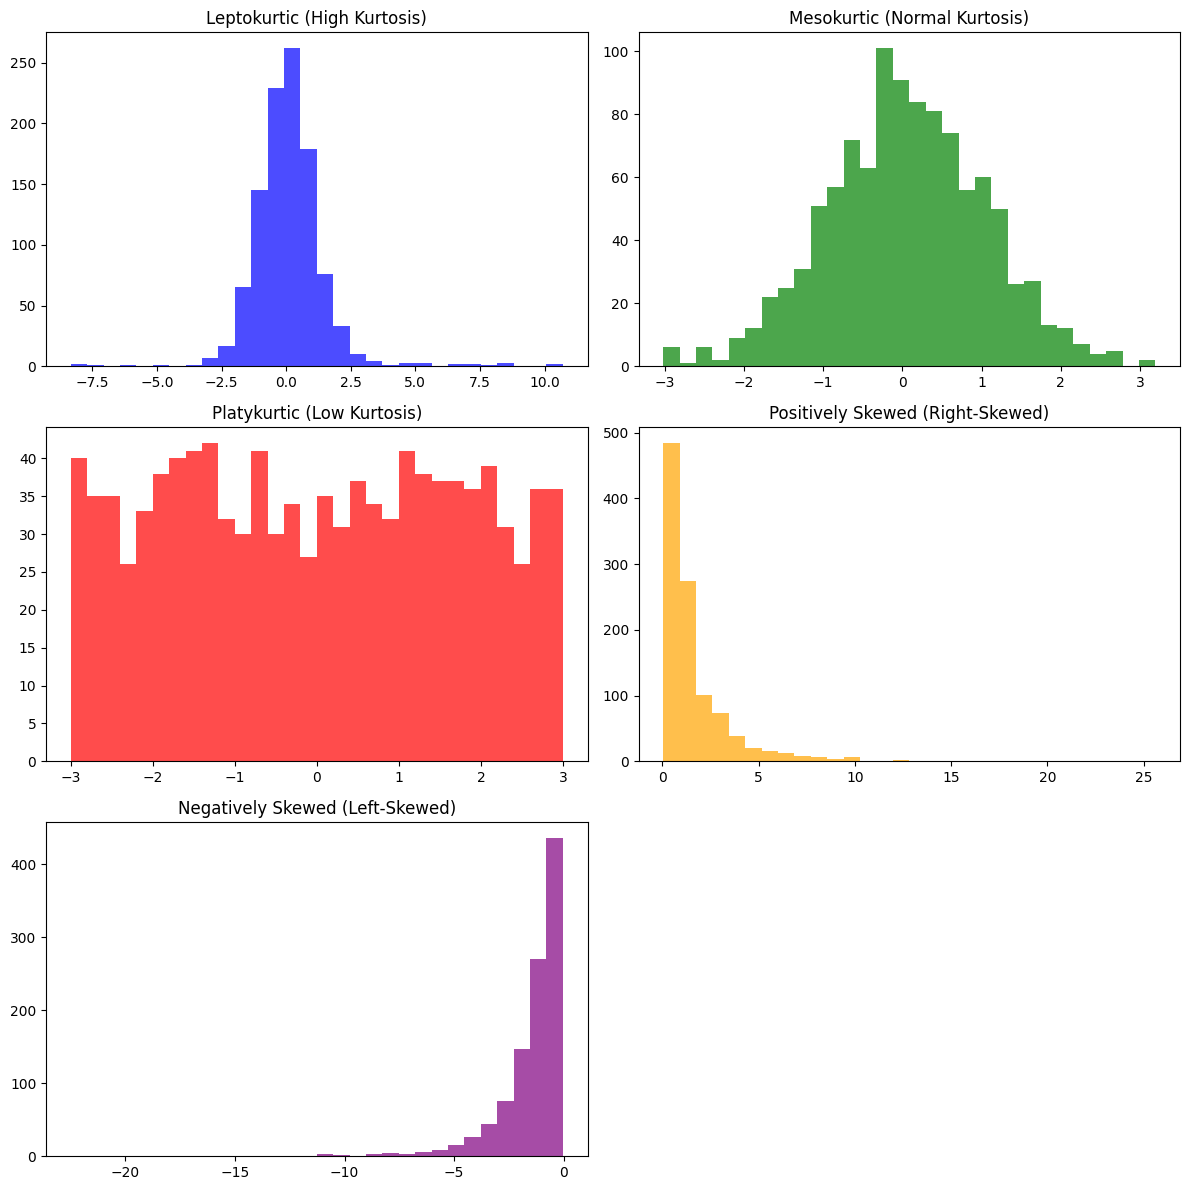

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# 1. Leptokurtic (High Kurtosis) - Data with frequent small changes and rare extreme values
leptokurtic_data = np.concatenate([np.random.normal(0, 1, 1000), np.random.normal(0, 5, 50)])

# 2. Mesokurtic (Normal Kurtosis) - Normally distributed data
mesokurtic_data = np.random.normal(0, 1, 1050)

# 3. Platykurtic (Low Kurtosis) - Flat distribution (uniformly distributed data)
platykurtic_data = np.random.uniform(-3, 3, 1050)

# 4. Positively skewed data (Right-Skewed)
positive_skew_data = np.random.lognormal(0, 1, 1050)

# 5. Negatively skewed data (Left-Skewed)
negative_skew_data = -np.random.lognormal(0, 1, 1050)

# Convert data to pandas series for easy computation
leptokurtic_series = pd.Series(leptokurtic_data)
mesokurtic_series = pd.Series(mesokurtic_data)
platykurtic_series = pd.Series(platykurtic_data)
positive_skew_series = pd.Series(positive_skew_data)
negative_skew_series = pd.Series(negative_skew_data)

# Calculate Skewness and Kurtosis
print(f"Leptokurtic: Skewness={leptokurtic_series.skew():.2f}, Kurtosis={leptokurtic_series.kurtosis():.2f}")
print(f"Mesokurtic: Skewness={mesokurtic_series.skew():.2f}, Kurtosis={mesokurtic_series.kurtosis():.2f}")
print(f"Platykurtic: Skewness={platykurtic_series.skew():.2f}, Kurtosis={platykurtic_series.kurtosis():.2f}")
print(f"Positively Skewed: Skewness={positive_skew_series.skew():.2f}, Kurtosis={positive_skew_series.kurtosis():.2f}")
print(f"Negatively Skewed: Skewness={negative_skew_series.skew():.2f}, Kurtosis={negative_skew_series.kurtosis():.2f}")

# Plot the distributions
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Plot for Leptokurtic Data
axes[0].hist(leptokurtic_data, bins=30, color='b', alpha=0.7)
axes[0].set_title('Leptokurtic (High Kurtosis)')

# Plot for Mesokurtic Data
axes[1].hist(mesokurtic_data, bins=30, color='g', alpha=0.7)
axes[1].set_title('Mesokurtic (Normal Kurtosis)')

# Plot for Platykurtic Data
axes[2].hist(platykurtic_data, bins=30, color='r', alpha=0.7)
axes[2].set_title('Platykurtic (Low Kurtosis)')

# Plot for Positively Skewed Data
axes[3].hist(positive_skew_data, bins=30, color='orange', alpha=0.7)
axes[3].set_title('Positively Skewed (Right-Skewed)')

# Plot for Negatively Skewed Data
axes[4].hist(negative_skew_data, bins=30, color='purple', alpha=0.7)
axes[4].set_title('Negatively Skewed (Left-Skewed)')

# Remove the empty subplot
fig.delaxes(axes[5])

# Adjust layout
plt.tight_layout()
plt.show()
